# Extended T_SNE.
Notebook showing use of extended t-sne library

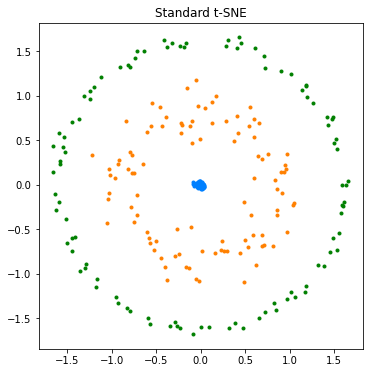

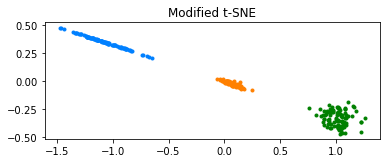

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from etsne import tsne


# synthetic data. 300 points (100 in 3 classes) in three overlapping clouds of varying densities
Nincloud = 100;
origin_dim = 50;

np.random.seed(2021); # seed to stabilize the data
X = np.zeros( (0,origin_dim) );
standard_devs = [1., 5., 25.]; # standard deviations and number of classes used in the toy data
for jj,sd in enumerate(standard_devs):
    Xtmp = sd*np.random.randn(Nincloud,origin_dim);
    X = np.vstack( (X,Xtmp) )


# Apply t-SNE and modified t-SNE
Y_orig   = tsne(X,perp=140,target_dim=2,Niter=120,variant='original', random_state=2021); # seed to stabilize the stochastic embedding
Y_conds2 = tsne(X,perp=70,target_dim=2,Niter=120,variant='conditional_s2', random_state=2021);


# Plotting
myColors = [(0,.5,1), (1,.5,0), (0,.5,0)]; # blue, orange, green

plt.figure(figsize=(6,6));
Yplot = Y_orig;
for jj in range(len(standard_devs)):
    class_restriction = np.arange(jj*Nincloud, (jj+1)*Nincloud);
    plt.plot(Yplot[class_restriction,0],Yplot[class_restriction,1],'.',color=myColors[jj]);
plt.gca().set_aspect(1)
plt.title('Standard t-SNE');
plt.show();

plt.figure(figsize=(6,6));
Yplot = Y_conds2;
for jj in range(len(standard_devs)):
    class_restriction = np.arange(jj*Nincloud, (jj+1)*Nincloud);
    plt.plot(Yplot[class_restriction,0],Yplot[class_restriction,1],'.',color=myColors[jj]);
plt.gca().set_aspect(1)
plt.title('Modified t-SNE');
plt.show();